# **Regress & Impress: House Price Prediction**

## **Introduction**

In this notebook, we explore the task of predicting house prices using regularized regression models. House price prediction is a common machine learning problem that involves predicting the value of a house based on various features such as square footage, number of bedrooms, location, and more. To make this task more realistic, we generate a synthetic dataset, mimicking real-world housing data, and apply three regularization techniques: Ridge, Lasso, and ElasticNet regression. These techniques help in improving model performance by preventing overfitting, a common issue in regression tasks.

### **Goals:**
- Understand the role of regularization in linear regression.
- Apply **Ridge**, **Lasso**, and **ElasticNet** regression to predict house prices.
- Explore the impact of regularization techniques on model performance.

## **Dataset Overview**

We begin by generating a synthetic dataset with 1,000 samples. The features of the dataset represent typical real estate attributes that influence house prices, including:
- **Square Footage**: The size of the house in square feet.
- **Number of Bedrooms**: The number of bedrooms in the house.
- **Age of House**: The number of years the house has been in existence.
- **Location**: The location of the house, categorized into 'downtown', 'suburban', and 'rural'.
- **Number of Bathrooms**: The number of bathrooms in the house.
- **Distance to School**: The distance from the house to the nearest school, in kilometers.
- **Crime Rate**: A numeric value representing the crime rate in the area where the house is located.

The target variable, **House Price**, is a function of the above features and is computed using a linear combination of square footage, number of bedrooms, and crime rate, with some random noise added to make the dataset more realistic.

### **Features of the Dataset:**
- 1,000 rows (samples) of data.
- 7 predictor features: square footage, number of bedrooms, age of house, location, number of bathrooms, distance to school, and crime rate.
- 1 target variable: house price.

## **Data Preprocessing**

### **Handling Categorical Data**:
The `location` feature is categorical and needs to be encoded as numerical values for machine learning models to work with it. This is done using **one-hot encoding**, which creates dummy variables for each location category, transforming the dataset into a format suitable for regression analysis.

### **Feature Scaling**:
Since regularized regression models like Ridge and Lasso are sensitive to the scale of the features, it is important to standardize the dataset. **StandardScaler** is used to scale the features, ensuring they all have a mean of 0 and a standard deviation of 1.

## **Models Used**

### 1. **Ridge Regression (L2 Regularization)**:
Ridge regression is a linear model that applies **L2 regularization**, which penalizes large coefficients. It is especially useful when the dataset has multicollinearity, or when the features are highly correlated. The regularization term helps in preventing the model from overfitting by adding a penalty to the loss function.

### 2. **Lasso Regression (L1 Regularization)**:
Lasso regression uses **L1 regularization**, which not only penalizes large coefficients but also encourages sparsity in the model. In other words, Lasso can shrink some coefficients to exactly zero, effectively performing feature selection. This is beneficial when there are many irrelevant features.

### 3. **ElasticNet Regression (Combination of L1 and L2 Regularization)**:
ElasticNet is a hybrid of Ridge and Lasso. It combines both **L1** and **L2** regularization, allowing it to enjoy the benefits of both models. ElasticNet is useful when there are many features that are correlated with each other, and when we want a balance between Lasso’s sparsity and Ridge’s stability.

### **Model Evaluation**:
For each regression model, we evaluate the performance using two key metrics:
- **Mean Squared Error (MSE)**: This measures the average squared difference between predicted and actual house prices. A lower MSE indicates better model performance.
- **R-squared (R2)**: This metric indicates the proportion of variance in the target variable (house prices) that is explained by the model. An R2 value closer to 1 suggests a better fit.

## **Results & Insights**

After applying all three models, we compare their performance based on the MSE and R2 score. Here’s what we can infer from the results:
- **Ridge Regression**: Generally performs well when the dataset has multicollinearity and can manage high variance effectively by penalizing large coefficients.
- **Lasso Regression**: Tends to perform better when feature selection is important, as it can zero out some coefficients entirely.
- **ElasticNet Regression**: Offers the best of both worlds, balancing the benefits of both Ridge and Lasso. It is most effective when there are correlated features.

The final choice of model depends on the nature of the data and the underlying problem. If feature selection is important, Lasso may be the best choice. If stability is a concern, Ridge is preferred. If the dataset has many correlated features, ElasticNet may be the ideal solution.

## **Conclusion**

In this notebook, we demonstrated how regularization techniques—Ridge, Lasso, and ElasticNet—can be applied to predict house prices in a synthetic dataset. By comparing these models, we gain insights into the strengths and weaknesses of each technique. Regularization helps mitigate overfitting and improves model generalization, making it a crucial tool for predictive modeling in real-world applications.


#Syntetic data prepration


In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate synthetic features with varied correlations and noise
# Feature 1: Highly correlated with the target (house price)
square_footage = np.random.normal(2000, 500, n_samples)  # Average square footage 2000 with std 500

# Feature 2: Slightly correlated with the target
num_bedrooms = np.random.randint(1, 6, n_samples)  # Random number of bedrooms between 1 and 5

# Feature 3: Weak correlation with the target
age_of_house = np.random.randint(0, 100, n_samples)  # Age of house between 0 and 100 years

# Feature 4: Noise, no correlation with the target
random_noise = np.random.normal(0, 100, n_samples)  # Random noise

# Feature 5: Another correlated feature
distance_to_school = np.random.normal(5, 1.5, n_samples)  # Average 5 km from school with std 1.5 km

# Feature 6: Another weak feature, could correlate slightly with price
crime_rate = np.random.normal(0.5, 0.2, n_samples)  # Crime rate (higher values represent worse crime rates)

# Feature 7: Categorical variable 'location'
location = np.random.choice(['downtown', 'suburban', 'rural'], size=n_samples, p=[0.4, 0.4, 0.2])  # Location

# Adding some interaction between features (e.g., larger houses have more bedrooms)
interaction_feature = square_footage * np.random.uniform(0.1, 0.2, n_samples)  # Interaction between square footage and some random factor

# Combine features into a DataFrame
df = pd.DataFrame({
    'square_footage': square_footage,
    'num_bedrooms': num_bedrooms,
    'age_of_house': age_of_house,
    'random_noise': random_noise,
    'distance_to_school': distance_to_school,
    'crime_rate': crime_rate,
    'location': location,
    'interaction_feature': interaction_feature
})

# Generate a target variable (house prices) with noise and non-linear relations
house_price = (square_footage * 300) + (num_bedrooms * 50000) - (crime_rate * 50000) + \
              (interaction_feature * 0.2) + np.random.normal(0, 100000, n_samples)  # Adding random noise to the target

df['house_price'] = house_price

df.head()

# Save the dataset to a CSV file
file_path = 'synthetic_house_prices.csv'
df.to_csv(file_path, index=False)


#Data Preprocessing

In [ ]:
# One-hot encoding for the categorical 'location' column
df = pd.get_dummies(df, columns=['location'], drop_first=True)

In [ ]:
# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
# Features and target variable
X = df.drop('house_price', axis=1)
y = df['house_price']

In [ ]:

# Scaling the features
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape

((800, 9), (200, 9))

#2. Model Training & Evaluation


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

In [ ]:
# Predictions and performance evaluation
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# Calculate MSE and R-squared for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [ ]:
mse_ridge, r2_ridge

(10314676652.999374, 0.7001321905160438)

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# Initialize and fit Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
# Predictions and performance evaluation
y_pred_lasso = lasso.predict(X_test)


In [ ]:
# Calculate MSE and R-squared for Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


In [ ]:
mse_lasso, r2_lasso

(10309734200.125412, 0.7002758772807047)

 ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit ElasticNet Regression model
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [ ]:
# Predictions and performance evaluation
y_pred_elasticnet = elasticnet.predict(X_test)

In [ ]:
# Calculate MSE and R-squared for ElasticNet
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

In [ ]:
mse_elasticnet, r2_elasticnet

(10570154693.09653, 0.6927049445797486)

#Visualizations

Comparing MSE of the Models

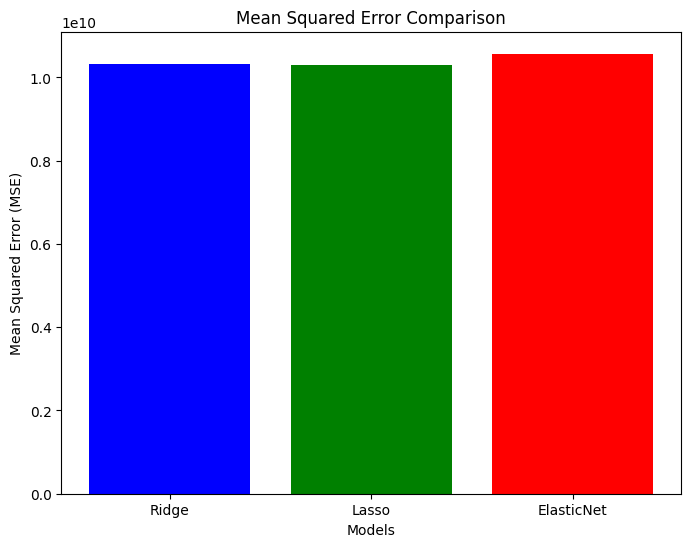

In [ ]:
import matplotlib.pyplot as plt

# MSE comparison for all models
models = ['Ridge', 'Lasso', 'ElasticNet']
mse_values = [mse_ridge, mse_lasso, mse_elasticnet]

plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.title('Mean Squared Error Comparison')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.show()


#Coefficients Comparison

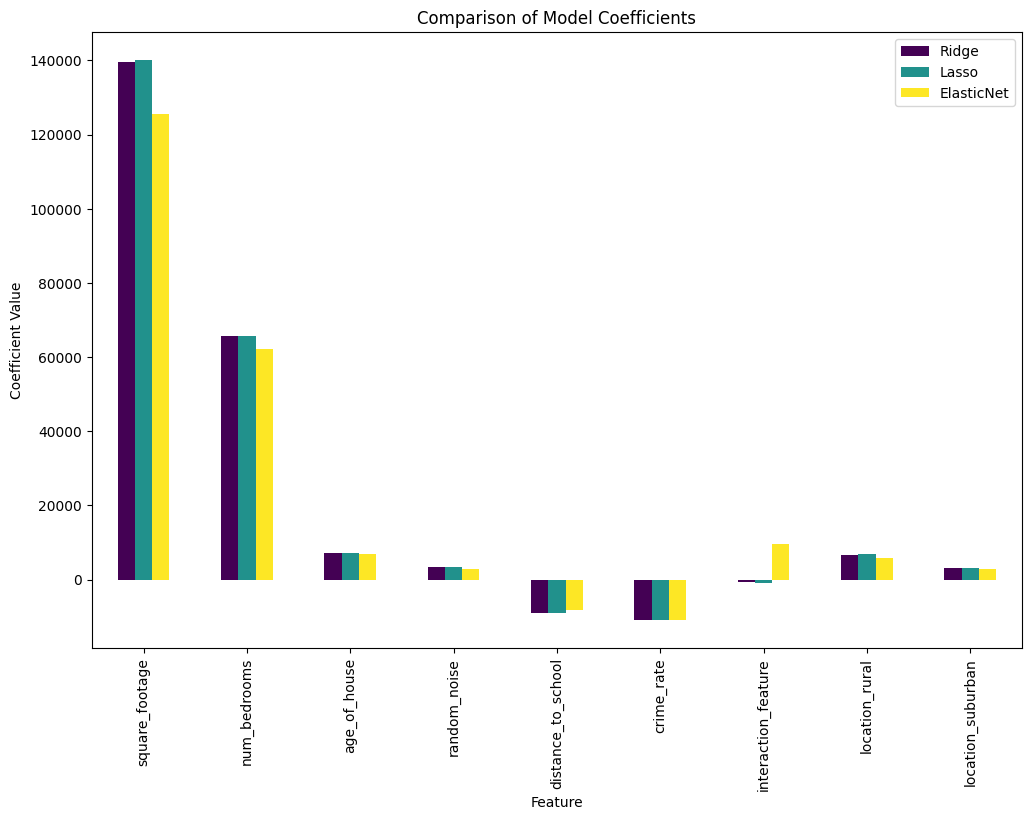

In [ ]:
# Visualize the coefficients of each model
coefficients_ridge = ridge.coef_
coefficients_lasso = lasso.coef_
coefficients_elasticnet = elasticnet.coef_

# Create a DataFrame to compare coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge': coefficients_ridge,
    'Lasso': coefficients_lasso,
    'ElasticNet': coefficients_elasticnet
})

# Plot the coefficients
coeff_df.set_index('Feature').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Comparison of Model Coefficients')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.show()


#Regularization Path (Alpha vs Coefficients)

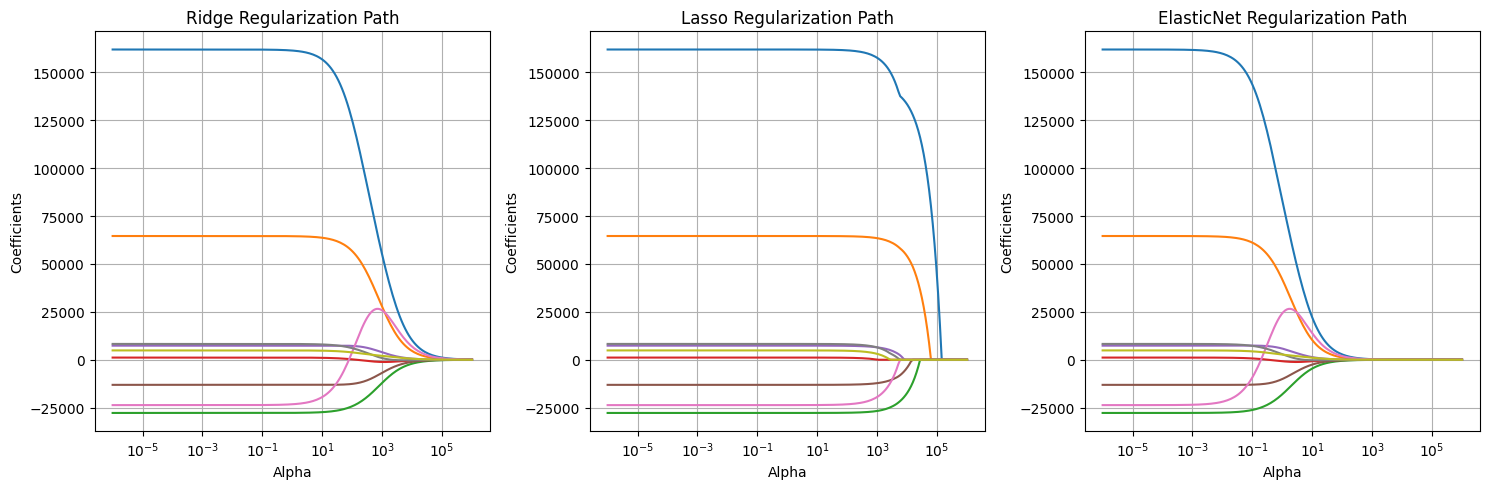

In [ ]:
from sklearn.linear_model import ridge_regression, lasso_path, enet_path
import matplotlib.pyplot as plt
import numpy as np

# Define alpha range
alphas = np.logspace(-6, 6, 200)

# Ridge regularization path
ridge_coefs = []
for alpha in alphas:
    coef = ridge_regression(X_train, y_train, alpha=alpha, solver='cholesky')
    ridge_coefs.append(coef)
ridge_coefs = np.array(ridge_coefs)

# Lasso regularization path
lasso_alphas, lasso_coefs, _ = lasso_path(X_train, y_train, alphas=alphas)

# ElasticNet regularization path
enet_alphas, enet_coefs, _ = enet_path(X_train, y_train, l1_ratio=0.5, alphas=alphas)

# Plot the regularization paths
plt.figure(figsize=(15, 5))

# Ridge
plt.subplot(131)
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.title('Ridge Regularization Path')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.grid()

# Lasso
plt.subplot(132)
plt.plot(lasso_alphas, lasso_coefs.T)
plt.xscale('log')
plt.title('Lasso Regularization Path')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.grid()

# ElasticNet
plt.subplot(133)
plt.plot(enet_alphas, enet_coefs.T)
plt.xscale('log')
plt.title('ElasticNet Regularization Path')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.grid()

plt.tight_layout()
plt.show()


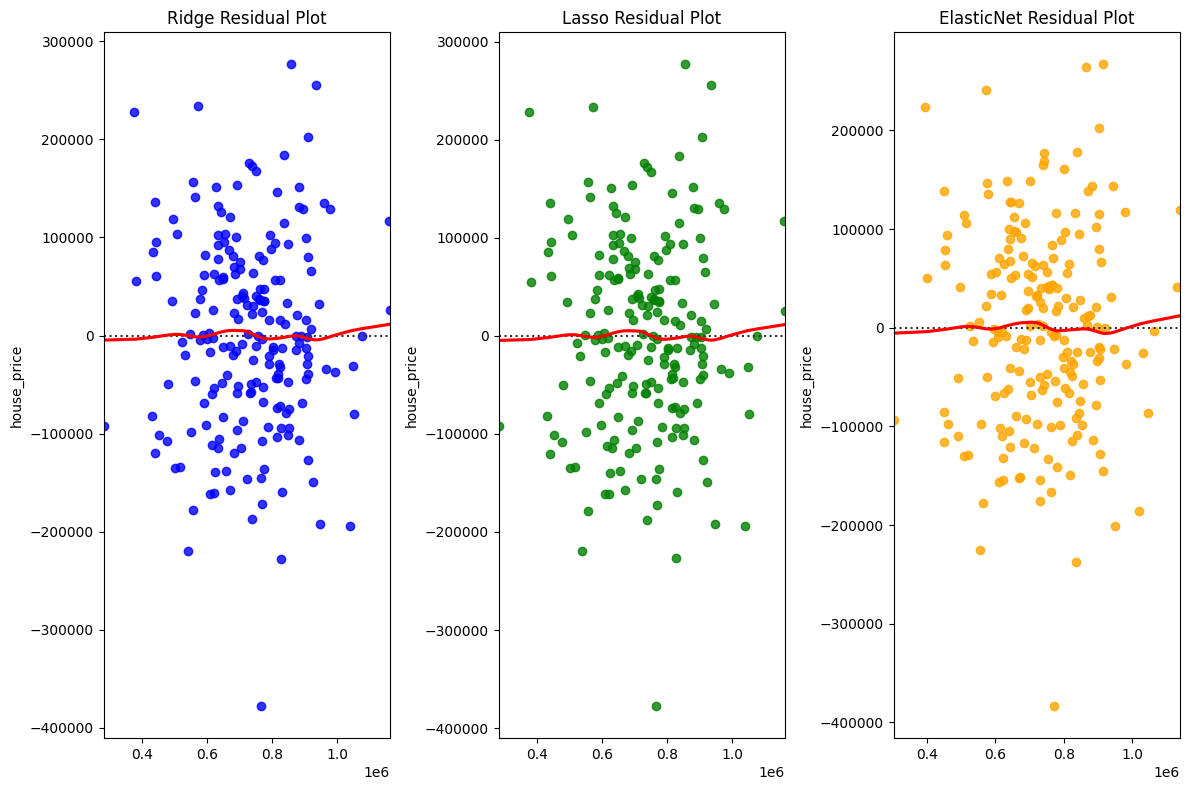

In [ ]:
import seaborn as sns
# Plot residuals for each model
plt.figure(figsize=(12, 8))

# Ridge residuals
plt.subplot(131)
sns.residplot(x=y_pred_ridge, y=y_test - y_pred_ridge, lowess=True, color='blue', line_kws={'color': 'red'})
plt.title('Ridge Residual Plot')

# Lasso residuals
plt.subplot(132)
sns.residplot(x=y_pred_lasso, y=y_test - y_pred_lasso, lowess=True, color='green', line_kws={'color': 'red'})
plt.title('Lasso Residual Plot')

# ElasticNet residuals
plt.subplot(133)
sns.residplot(x=y_pred_elasticnet, y=y_test - y_pred_elasticnet, lowess=True, color='orange', line_kws={'color': 'red'})
plt.title('ElasticNet Residual Plot')

plt.tight_layout()
plt.show()


#Save Models and Scaler

In [ ]:
import pickle

In [ ]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('ridge.pkl', 'wb') as f:
    pickle.dump(ridge, f)

with open('lasso.pkl', 'wb') as f:
    pickle.dump(lasso, f)

with open('elasticnet.pkl', 'wb') as f:
    pickle.dump(elasticnet, f)

#Load Models

In [ ]:
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('ridge.pkl', 'rb') as f:
    ridge_model = pickle.load(f)

with open('lasso.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

with open('elasticnet.pkl', 'rb') as f:
    elasticnet_model = pickle.load(f)


#Predication on new data

In [ ]:
# Convert feature_columns to a list of column names (strings)
feature_columns = X.columns.tolist()

# Example new data
new_data = pd.DataFrame({
    'square_footage': [2200],
    'num_bedrooms': [3],
    'age_of_house': [15],
    'location': ['suburban'],  # Categorical
    'num_bathrooms': [2],
    'distance_to_school': [4.2],
    'crime_rate': [0.3]
})

# One-hot encoding for location
location_dummies = pd.get_dummies(new_data['location'], prefix='location')
new_data = pd.concat([new_data.drop('location', axis=1), location_dummies], axis=1)

# Add interaction feature (square_footage * num_bedrooms) and random noise
new_data['interaction_feature'] = new_data['square_footage'] * new_data['num_bedrooms']
new_data['random_noise'] = np.random.normal(0, 1, new_data.shape[0])

# Ensure new_data has the same columns as the training dataset
missing_cols = set(feature_columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0  # Add missing columns with default value 0

# Reorder columns to match the training dataset
new_data = new_data[feature_columns]

# Preprocess new data using the saved scaler
new_data_scaled = scaler.transform(new_data)

# Make predictions using the trained models
ridge_prediction = ridge_model.predict(new_data_scaled)
lasso_prediction = lasso_model.predict(new_data_scaled)
elasticnet_prediction = elasticnet_model.predict(new_data_scaled)

# Print predictions
print("Predictions:")
print(f"Ridge Prediction: {ridge_prediction[0]}")
print(f"Lasso Prediction: {lasso_prediction[0]}")
print(f"ElasticNet Prediction: {elasticnet_prediction[0]}")

Predictions:
Ridge Prediction: 753484.9255149474
Lasso Prediction: 731713.010654404
ElasticNet Prediction: 1434058.4264864894


In [ ]:
!pip install flask flask-ngrok


In [ ]:
# Import required libraries
from flask import Flask, request
from flask_ngrok import run_with_ngrok
import numpy as np
import pickle
import os

# Check and debug the working directory
print("Working Directory Contents:", os.listdir())

# Load the models and scaler
try:
    ridge_model = pickle.load(open('ridge.pkl', 'rb'))
    lasso_model = pickle.load(open('lasso.pkl', 'rb'))
    elasticnet_model = pickle.load(open('elasticnet.pkl', 'rb'))
    scaler = pickle.load(open('scaler.pkl', 'rb'))
    print("Models and Scaler Loaded Successfully!")
except FileNotFoundError as e:
    print(f"File Loading Error: {e}")
    raise

# Initialize Flask app
app = Flask(__name__)
run_with_ngrok(app)  # Attach ngrok to Flask app

# Define the home page
@app.route('/')
def home():
    return '''
    <html>
        <head>
            <title>House Price Prediction</title>
        </head>
        <body style="text-align: center; font-family: Arial, sans-serif;">
            <h1>House Price Prediction</h1>
            <form action="/predict" method="post">
                <label>Square Footage:</label><br>
                <input type="text" name="square_footage" placeholder="Enter square footage"><br><br>
                <label>Number of Bedrooms:</label><br>
                <input type="text" name="num_bedrooms" placeholder="Enter number of bedrooms"><br><br>
                <label>Age of House:</label><br>
                <input type="text" name="age_of_house" placeholder="Enter age of house"><br><br>
                <label>Location (downtown, suburban, rural):</label><br>
                <input type="text" name="location" placeholder="Enter location"><br><br>
                <label>Number of Bathrooms:</label><br>
                <input type="text" name="num_bathrooms" placeholder="Enter number of bathrooms"><br><br>
                <label>Distance to School:</label><br>
                <input type="text" name="distance_to_school" placeholder="Enter distance to school"><br><br>
                <label>Crime Rate:</label><br>
                <input type="text" name="crime_rate" placeholder="Enter crime rate"><br><br>
                <button type="submit">Predict</button>
            </form>
        </body>
    </html>
    '''

# Define the prediction route
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Read form data
        data = [float(request.form[field]) for field in [
            'square_footage', 'num_bedrooms', 'age_of_house',
            'num_bathrooms', 'distance_to_school', 'crime_rate'
        ]]
        location = request.form['location'].lower()

        # Encode location as one-hot
        location_mapping = {'downtown': [1, 0], 'suburban': [0, 1], 'rural': [0, 0]}
        location_features = location_mapping.get(location, [0, 0])  # Default to rural
        data.extend(location_features)

        # Convert to NumPy array and scale data
        data = np.array(data).reshape(1, -1)
        data_scaled = scaler.transform(data)

        # Make predictions using all models
        ridge_prediction = ridge_model.predict(data_scaled)[0]
        lasso_prediction = lasso_model.predict(data_scaled)[0]
        elasticnet_prediction = elasticnet_model.predict(data_scaled)[0]

        # Return predictions
        return f'''
        <h1>Predicted House Prices:</h1>
        <ul>
            <li>Ridge Model: ${ridge_prediction:.2f}</li>
            <li>Lasso Model: ${lasso_prediction:.2f}</li>
            <li>ElasticNet Model: ${elasticnet_prediction:.2f}</li>
        </ul>
        '''
    except Exception as e:
        return f"<h2>Error Occurred: {e}</h2>"

# Run the app
if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 199, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 789, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll